In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import pathlib

data_dir = './apple_orange_photos'

data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

3330
Found 3330 files belonging to 3 classes.
Using 2664 files for training.
Found 3330 files belonging to 3 classes.
Using 666 files for validation.
['apple', 'orange', 'others']
Error in callback <function flush_figures at 0x178e4f700> (for post_execute):


KeyboardInterrupt: 

In [2]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


2022-08-09 16:43:17.370092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - ETA: 0s - loss: 0.4851 - accuracy: 0.8134

2022-08-09 16:43:25.419306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - 9s 98ms/step - loss: 0.4851 - accuracy: 0.8134 - val_loss: 0.4990 - val_accuracy: 0.8333
Epoch 2/20
84/84 [==============================] - 9s 110ms/step - loss: 0.3213 - accuracy: 0.8926 - val_loss: 0.3716 - val_accuracy: 0.8784
Epoch 3/20
84/84 [==============================] - 9s 104ms/step - loss: 0.2586 - accuracy: 0.9122 - val_loss: 0.4141 - val_accuracy: 0.8724
Epoch 4/20
84/84 [==============================] - 8s 94ms/step - loss: 0.2220 - accuracy: 0.9253 - val_loss: 0.3693 - val_accuracy: 0.8934
Epoch 5/20
84/84 [==============================] - 8s 90ms/step - loss: 0.1761 - accuracy: 0.9433 - val_loss: 0.3962 - val_accuracy: 0.8919
Epoch 6/20
84/84 [==============================] - 8s 91ms/step - loss: 0.1575 - accuracy: 0.9508 - val_loss: 0.4320 - val_accuracy: 0.8934
Epoch 7/20
84/84 [==============================] - 8s 92ms/step - loss: 0.1818 - accuracy: 0.9347 - val_loss: 0.4810 - val_accuracy: 0.8829
Epoch 8/20
84/84 [====

b'apple_orange_photos/apple/n07740461_9835.jpg'
b'apple_orange_photos/apple/n07740461_15013.jpg'
b'apple_orange_photos/orange/n07749192_2716.jpg'
b'apple_orange_photos/apple/n07740461_8892.jpg'
b'apple_orange_photos/orange/n07749192_6202.jpg'
['apple' 'orange' 'others']
2664
666
Image shape:  (180, 180, 3)
Label:  0


2022-08-09 16:51:49.674225: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


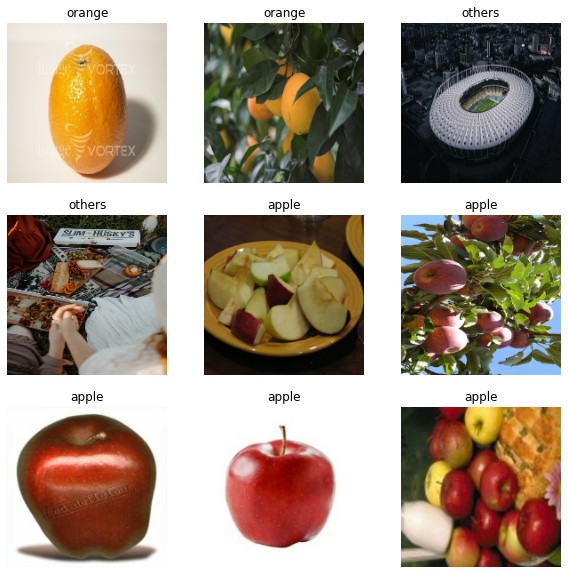

In [6]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

for f in list_ds.take(5):
  print(f.numpy())

class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)


list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)


class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))

val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [7]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


2022-08-09 16:52:07.182245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - ETA: 0s - loss: 0.1652 - accuracy: 0.9621

2022-08-09 16:52:15.224540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - 9s 101ms/step - loss: 0.1652 - accuracy: 0.9621 - val_loss: 0.0953 - val_accuracy: 0.9730
Epoch 2/5
84/84 [==============================] - 8s 98ms/step - loss: 0.0697 - accuracy: 0.9805 - val_loss: 0.0483 - val_accuracy: 0.9850
Epoch 3/5
84/84 [==============================] - 8s 96ms/step - loss: 0.0205 - accuracy: 0.9947 - val_loss: 0.0455 - val_accuracy: 0.9880
Epoch 4/5
84/84 [==============================] - 8s 97ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0675 - val_accuracy: 0.9895
Epoch 5/5
84/84 [==============================] - 8s 96ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9865


In [10]:
!mkdir -p saved_model
model.save('saved_model/apple_orange_model')

INFO:tensorflow:Assets written to: saved_model/apple_orange_model/assets


INFO:tensorflow:Assets written to: saved_model/apple_orange_model/assets


In [13]:
apple_orange_model = tf.keras.models.load_model('saved_model/apple_orange_model')

apple_orange_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [4]:
img_url = '../uploads/image6.png'

img = tf.keras.utils.load_img(
    img_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'model' is not defined

In [5]:
apple_orange_model = tf.keras.models.load_model('saved_model/apple_orange_model')

apple_orange_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [9]:
img_url = '../uploads/image6.png'

img = tf.keras.utils.load_img(
    img_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = apple_orange_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 451ms/step
This image most likely belongs to orange with a 99.47 percent confidence.
